In [97]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

### Leitura e Manipulação de arquivos em CSV, Excel e TXT

In [50]:
#csv contendo os pontos de iluminação pública de Recife
_csv = pd.read_csv(r'D:\POLI - UPE\2022.1\LPAA\Tarefa 3\CADASTRO DE IP ABRIL 2022.csv',delimiter=';',low_memory=False)

#Excel contendo as faturas de energia (conta de luz) paga pela EMLURB nos meses de Junho e Julho de 2022
_excel = pd.read_excel(r'D:\POLI - UPE\2022.1\LPAA\Tarefa 3\Dados Contas_Jun_e_Jul.xlsx')

#TXT contendo a descrição da atividade - Só como exemplo
_txt = pd.read_csv(r'D:\POLI - UPE\2022.1\LPAA\Tarefa 3\conteudo_atv3.txt',delimiter=None)

In [51]:
_excel.head() #Dados de faturas referentes à conta de energia elétrica pagas pela EMLURB

,Numero da Nota Fiscal,Conta Contrato,Numero da Instalacao,Data de Vencimento,Classificacao,Total a Pagar (R$),Consumo (kwh),Padrao de Entrada,Bandeira Amarela,Bandeira Vermelha,...,Imposto COFIS,Num Medidor,Funcao,Data Anteriror,Leitura Ant.,Data Atual,Leitura Atual,Num de Dias,Constante,CAT(kwh)
0,25664393,7026631500,6490294,2018-08-09,B4a,0.00,0.00,Monofasico,0.0,28.65,...,8.26,NaN,NaN,NaT,NaN,NaT,NaN,NaN,NaN,NaN
1,102361956,7028645150,6597075,2020-04-17,B4a,108.94,1006.00,Trifasico,0.0,0.00,...,21.04,3181693834,CAT,2020-02-19,210.0,2020-03-20,10610.0,30.0,1.0,1006.0
2,102361957,7028645966,6597107,2020-04-17,B4a,75.25,1617.00,Trifasico,0.0,0.00,...,33.83,3181693591,CAT,2020-02-19,390.0,2020-03-20,17715.0,30.0,1.0,1617.0
3,30029153,7022616760,5872406,2018-09-28,B4a,118.84,5.75,Trifasico,0.0,230.41,...,97.02,NaN,NaN,NaT,NaN,NaT,NaN,NaN,NaN,NaN
4,1891868,7026631500,6490294,2017-12-11,B4a,0.00,0.00,Monofasico,0.0,29.11,...,10.24,NaN,NaN,NaT,NaN,NaT,NaN,NaN,NaN,NaN


,Numero da Nota Fiscal,Conta Contrato,Numero da Instalacao,Data de Vencimento,Classificacao,Total a Pagar (R$),Consumo (kwh),Padrao de Entrada,Bandeira Amarela,Bandeira Vermelha,...,Imposto COFIS,Num Medidor,Funcao,Data Anteriror,Leitura Ant.,Data Atual,Leitura Atual,Num de Dias,Constante,CAT(kwh)
1601,110476645,7022275784,6253497,2020-06-26,B4a,3907.45,9014.0,Trifasico,0.0,0.0,...,158.23,3160004290,CAT,2020-04-02,99807.0,2020-05-05,108821.0,33.0,1.0,9014.0


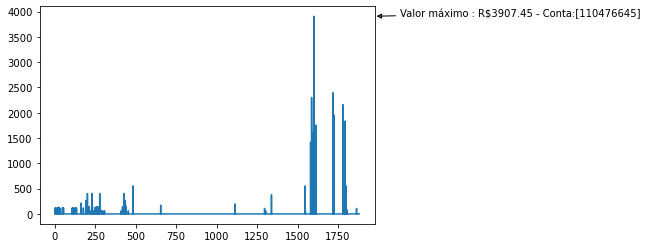

In [78]:
# Gráfico dos valores a serem pagos em cada conta
_excel['Total a Pagar (R$)'].plot()

# Maior valor da fatura
Maio_valor = _excel['Total a Pagar (R$)'].max()

# Número da nota fiscal associado ao maior valor a ser pago
ID_conta = _excel['Numero da Nota Fiscal'][_excel['Total a Pagar (R$)'] == _excel['Total a Pagar (R$)'].max()].values

# Texto que será mostrado no gráfico
Text = "Valor máximo : R$" + str(MaxValue) + " - " + "Conta:" + str(MaxName)

# Colocando o texto no gráfico
plt.annotate(Text, xy=(1, MaxValue), 
                   xytext=(25, 0), 
                   xycoords=('axes fraction', 'data'), 
                   textcoords='offset points',
                   arrowprops=dict(arrowstyle='-|>'))


_excel[_excel['Total a Pagar (R$)'] == _excel['Total a Pagar (R$)'].max()]

### Tratamento e filtragem de dados ausentes

In [79]:
 from numpy import nan as NA

In [92]:
data = pd.Series([1, NA, 3.5, NA, 7])

In [93]:
data

0    1.0
1    NaN
2    3.5
3    NaN
4    7.0
dtype: float64

In [94]:
#Remove NaN
data.dropna()

0    1.0
2    3.5
4    7.0
dtype: float64

###  Preenchimento de dados ausentes

In [98]:
df = pd.DataFrame(np.random.randn(7, 3))

In [99]:
df

,0,1,2
0,-0.164194,1.836048,-0.316119
1,0.558941,-0.863507,0.269107
2,0.661645,-0.582333,-0.412670
3,-0.158654,0.964459,0.015258
4,-1.039682,-0.479898,-1.056085
5,-0.225200,0.843079,-0.050961
6,0.273239,-1.063197,-1.118911


In [100]:
# Adicionando "valores" NA no dataframe
df.iloc[:4, 1] = NA
df.iloc[:2, 2] = NA


In [101]:
df

,0,1,2
0,-0.164194,NaN,NaN
1,0.558941,NaN,NaN
2,0.661645,NaN,-0.412670
3,-0.158654,NaN,0.015258
4,-1.039682,-0.479898,-1.056085
5,-0.225200,0.843079,-0.050961
6,0.273239,-1.063197,-1.118911


In [102]:
#Substituindo valores ausentes por 0
df.fillna(0)

,0,1,2
0,-0.164194,0.000000,0.000000
1,0.558941,0.000000,0.000000
2,0.661645,0.000000,-0.412670
3,-0.158654,0.000000,0.015258
4,-1.039682,-0.479898,-1.056085
5,-0.225200,0.843079,-0.050961
6,0.273239,-1.063197,-1.118911


##       Transformação de dados
###   Remoção de duplicatas

In [103]:
data = pd.DataFrame({'k1': ['one', 'two'] * 3 + ['two'], 'k2': [1, 1, 2, 3, 3, 4, 4]})

In [104]:
data

,k1,k2
0,one,1
1,two,1
2,one,2
3,two,3
4,one,3
5,two,4
6,two,4


In [115]:
#verificando arquivos duplicados
data.duplicated()

0    False
1    False
2    False
3    False
4    False
5    False
6     True
dtype: bool

In [118]:
#Revmovendo duplicados
data.drop_duplicates()

,k1,k2
0,one,1
1,two,1
2,one,2
3,two,3
4,one,3
5,two,4


In [120]:
#verificando arquivos duplicados do arquivo csv
_csv.duplicated()

0         False
1         False
2          True
3         False
4         False
          ...  
105972     True
105973    False
105974    False
105975    False
105976    False
Length: 105977, dtype: bool

In [122]:
#Revmovendo duplicados do arquivo csv
len(_csv.drop_duplicates())

94085

###### Podemos observar a diferença no tamanho do csv com e sem duplicatas. Ao total foram removidas 11.892 linhas duplicadas

### Renomeando os índices dos eixos

In [123]:
_txt

,Texto contendo o conteúdo da atividade 3
0,Leitura e Manipulação de arquivos em CSV Excel...
1,Tratamento e filtragem de dados ausentes
2,Preenchimento de dados ausentes
3,Transformação de dados
4,Remoção de duplicatas
5,Renomeação de índices num dataframe
6,Discretização (Binning)
7,Filtragem de valores discrepantes
8,Variáveis indicadoras/dummy
9,Manipulação de strings e expressões regulares


In [141]:
indices = ['a','b','c','d','e','f','g','h','i','j','k']

In [145]:
_txt.index = indices

In [146]:
_txt

,Texto contendo o conteúdo da atividade 3
a,Leitura e Manipulação de arquivos em CSV Excel...
b,Tratamento e filtragem de dados ausentes
c,Preenchimento de dados ausentes
d,Transformação de dados
e,Remoção de duplicatas
f,Renomeação de índices num dataframe
g,Discretização (Binning)
h,Filtragem de valores discrepantes
i,Variáveis indicadoras/dummy
j,Manipulação de strings e expressões regulares


### Discretização (Binning)

In [223]:
# Pegando todos os valores da conta e tranformando em uma lista
valores_conta = list(_excel['Total a Pagar (R$)'])
valores_conta.sort()

#agrupar de 0-60, 61-120, 121-180,181-240,241-301, 300-até o fim
bins = [0,60,120,180,240,300,4000]
conjunto = pd.cut(valores_conta,bins)

In [231]:
valores_conta[990:1000]

[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]

In [230]:
conjunto[1800:]

[(0, 60], (0, 60], (0, 60], (0, 60], (0, 60], ..., (300, 4000], (300, 4000], (300, 4000], (300, 4000], (300, 4000]]
Length: 83
Categories (6, interval[int64, right]): [(0, 60] < (60, 120] < (120, 180] < (180, 240] < (240, 300] < (300, 4000]]

In [225]:
conjunto.categories

IntervalIndex([(0, 60], (60, 120], (120, 180], (180, 240], (240, 300], (300, 4000]], dtype='interval[int64, right]')

In [232]:
pd.value_counts(conjunto)

(60, 120]      34
(300, 4000]    22
(0, 60]        17
(120, 180]     13
(180, 240]      3
(240, 300]      2
dtype: int64

### Filtragem de valores discrepantes

In [235]:
_excel['Total a Pagar (R$)'].describe()

count    1883.000000
mean       19.700133
std       175.299443
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max      3907.450000
Name: Total a Pagar (R$), dtype: float64

In [280]:
#Filtrando valores maiores que R$ 1000,00
_excel['Total a Pagar (R$)'][(np.abs(_excel['Total a Pagar (R$)']) >1000)]

1581    1418.09
1587    2301.88
1588    1563.02
1593    1351.71
1598    1594.51
1599    1612.51
1601    3907.45
1608    1352.58
1615    1754.87
1719    2394.92
1726    1953.75
1781    2159.02
1791    1201.16
1794    1837.00
Name: Total a Pagar (R$), dtype: float64

In [283]:
#Filtrando valores maiores que R$ 2000,00
_excel['Total a Pagar (R$)'][(np.abs(_excel['Total a Pagar (R$)']) >2000)]

1587    2301.88
1601    3907.45
1719    2394.92
1781    2159.02
Name: Total a Pagar (R$), dtype: float64

### Variáveis indicadoras/dummy

In [290]:
np.random.seed(10)
values = np.random.rand(10)

In [291]:
values

array([0.77132064, 0.02075195, 0.63364823, 0.74880388, 0.49850701,
       0.22479665, 0.19806286, 0.76053071, 0.16911084, 0.08833981])

In [303]:
bins_2 = [0, 0.2, 0.4, 0.6, 0.8, 1]

In [304]:
pd.get_dummies(pd.cut(values, bins_2))

,"(0.0, 0.2]","(0.2, 0.4]","(0.4, 0.6]","(0.6, 0.8]","(0.8, 1.0]"
0,0,0,0,1,0
1,1,0,0,0,0
2,0,0,0,1,0
3,0,0,0,1,0
4,0,0,1,0,0
5,0,1,0,0,0
6,1,0,0,0,0
7,0,0,0,1,0
8,1,0,0,0,0
9,1,0,0,0,0


### Manipulação de strings e expressões regulares

In [330]:
_txt['Texto contendo o conteúdo da atividade 3']

a    Leitura e Manipulação de arquivos em CSV Excel...
b             Tratamento e filtragem de dados ausentes
c                      Preenchimento de dados ausentes
d                               Transformação de dados
e                                Remoção de duplicatas
f                  Renomeação de índices num dataframe
g                              Discretização (Binning)
h                    Filtragem de valores discrepantes
i                          Variáveis indicadoras/dummy
j        Manipulação de strings e expressões regulares
k                       Funções de strings vetorizadas
Name: Texto contendo o conteúdo da atividade 3, dtype: object

In [331]:
atividade = str(list(_txt['Texto contendo o conteúdo da atividade 3']))

In [332]:
#Verificando a ocorrência da palavra: dados
atividade.count('dados')

3

In [334]:
#Subistituindo a primeira letra
atividade.replace('dados','Dados')

"['Leitura e Manipulação de arquivos em CSV Excel e TXT', 'Tratamento e filtragem de Dados ausentes', 'Preenchimento de Dados ausentes', 'Transformação de Dados', 'Remoção de duplicatas', 'Renomeação de índices num dataframe', 'Discretização (Binning)', 'Filtragem de valores discrepantes', 'Variáveis indicadoras/dummy', 'Manipulação de strings e expressões regulares', 'Funções de strings vetorizadas']"

In [335]:
import re

In [339]:
texto= str(list(_txt['Texto contendo o conteúdo da atividade 3']))

In [341]:
texto

"['Leitura e Manipulação de arquivos em CSV Excel e TXT', 'Tratamento e filtragem de dados ausentes', 'Preenchimento de dados ausentes', 'Transformação de dados', 'Remoção de duplicatas', 'Renomeação de índices num dataframe', 'Discretização (Binning)', 'Filtragem de valores discrepantes', 'Variáveis indicadoras/dummy', 'Manipulação de strings e expressões regulares', 'Funções de strings vetorizadas']"

In [349]:
#Removedo espaço em brando
print(re.split('\s+' ,texto))

["['Leitura", 'e', 'Manipulação', 'de', 'arquivos', 'em', 'CSV', 'Excel', 'e', "TXT',", "'Tratamento", 'e', 'filtragem', 'de', 'dados', "ausentes',", "'Preenchimento", 'de', 'dados', "ausentes',", "'Transformação", 'de', "dados',", "'Remoção", 'de', "duplicatas',", "'Renomeação", 'de', 'índices', 'num', "dataframe',", "'Discretização", "(Binning)',", "'Filtragem", 'de', 'valores', "discrepantes',", "'Variáveis", "indicadoras/dummy',", "'Manipulação", 'de', 'strings', 'e', 'expressões', "regulares',", "'Funções", 'de', 'strings', "vetorizadas']"]


### Funções de string vetorizadas no pandas


In [350]:
data = {'Dave': 'dave@google.com', 'Steve': 'steve@gmail.com','Rob': 'rob@gmail.com', 'Wes': np.nan}
data = pd.Series(data)

In [351]:
data

Dave     dave@google.com
Steve    steve@gmail.com
Rob        rob@gmail.com
Wes                  NaN
dtype: object

In [352]:
data.isnull()

Dave     False
Steve    False
Rob      False
Wes       True
dtype: bool

In [353]:
pattern = '([A-Z0-9._%+-]+)@([A-Z0-9.-]+)\\.([A-Z]{2,4})'

In [354]:
data.str.findall(pattern, flags=re.IGNORECASE)

Dave     [(dave, google, com)]
Steve    [(steve, gmail, com)]
Rob        [(rob, gmail, com)]
Wes                        NaN
dtype: object

In [355]:
matches = data.str.match(pattern, flags=re.IGNORECASE)

In [356]:
matches

Dave     True
Steve    True
Rob      True
Wes       NaN
dtype: object

In [360]:
data.str[:5]

Dave     dave@
Steve    steve
Rob      rob@g
Wes        NaN
dtype: object